In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib import cm
import matplotlib

## first plot
* for the first plot(bar chart and pie chart), I draw these three plots, and I eventually end up with what is plotted in the file 'Main project'

In [2]:
df = pd.read_csv('tickets.csv',parse_dates=['creation_date', 'view_date', 'action_date'])
df.head()

,ticket_type,creation_date,view_date,action_date,customer_satisfaction,customer_problem_resolved,user_actioned,user_team
0,live_chat,2021-07-02 08:36:00,2021-07-02 08:36:00,2021-07-02 08:50:00,1,False,291950,orange
1,web_form,2021-07-02 02:37:00,2021-07-02 08:51:00,2021-07-02 09:12:00,1,False,291950,orange
2,web_form,2021-07-02 02:50:00,2021-07-02 09:15:00,2021-07-02 09:38:00,1,False,291950,orange
3,web_form,2021-07-02 02:01:00,2021-07-02 09:44:00,2021-07-02 10:06:00,1,False,291950,orange
4,web_form,2021-07-02 02:41:00,2021-07-02 10:14:00,2021-07-02 10:37:00,2,False,291950,orange


In [3]:
scoredf = df[['customer_satisfaction', 'ticket_type']].groupby('customer_satisfaction').count().rename(columns={'ticket_type':'number'}).sort_values(by='number',ascending=False).reset_index()
scoredf

,customer_satisfaction,number
0,1,14046
1,2,5176
2,3,5108
3,4,3669
4,5,3521


In [4]:
number_of_tickets = df.count()['customer_satisfaction']
number_of_tickets

31520

In [5]:
#change the index of dataform 
scoredf['ii'] = [4,3,2,1,0]
scoredf = scoredf.set_index('ii')

In [6]:
colors =[ '#2c7bb6', '#abd9e9', '#ffffbf','#fdae61', '#d7191c']
xticks = list(np.arange(3000,31000,2000))
xticks.append(number_of_tickets)

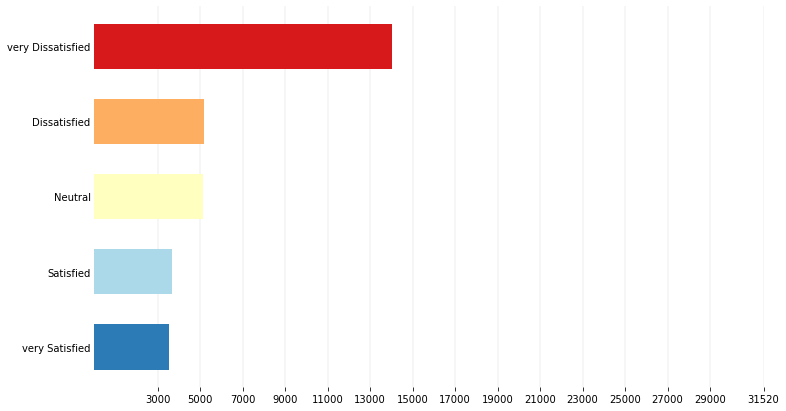

In [7]:
fig, ax = plt.subplots(figsize=(12,7))
ax.barh(['very Satisfied','Satisfied', 'Neutral', 'Dissatisfied', 'very Dissatisfied'], scoredf['number'].sort_index(), 
        Height=0.6, align= 'center', color= colors, zorder=3)
ax.set_yticks([-0.1, 0.9, 1.9, 2.9, 3.9])


ax.set_xlim((0,number_of_tickets))
ax.set_xticks(xticks)
ax.tick_params(axis='y', which='major',length=0)
ax.xaxis.grid(zorder=0, linewidth=0.2) 

# Hide the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [8]:
list_percent = (scoredf['number'] / number_of_tickets).tolist()
round_list_percent = [round(round(num, 3)*100,1) for num in list_percent]
round_list_percent.sort()
round_list_percent

[11.2, 11.6, 16.2, 16.4, 44.6]

In [9]:
xticks1 = list(np.arange(3500,15000,1500))
colors =[ '#2c7bb6', '#abd9e9', '#ffffbf','#fdae61', '#d7191c']
ylabels = ['very Satisfied','Satisfied', 'Neutral', 'Dissatisfied', 'very Dissatisfied']

new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(ylabels, round_list_percent)]
new_labels

['very Satisfied  11.2%',
 'Satisfied  11.6%',
 'Neutral  16.2%',
 'Dissatisfied  16.4%',
 'very Dissatisfied  44.6%']

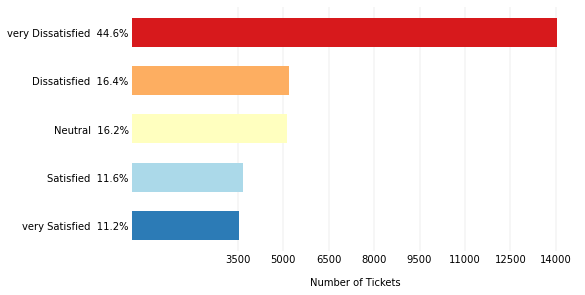

In [10]:
fig, ax = plt.subplots(figsize=(8,4.5))
ax.barh(new_labels, scoredf['number'].sort_index(), 
        Height=0.6, align= 'center', color=colors, zorder=3)
ax.set_yticks([-0.1, 0.9, 1.9, 2.9, 3.9])


ax.set_xticks(xticks1)
ax.tick_params(axis='both', which='major',length=0)
ax.xaxis.grid(zorder=0, linewidth=0.2) 
ax.set_xlabel('Number of Tickets', labelpad = 13)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

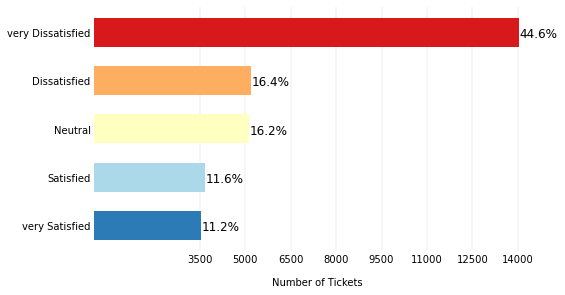

In [11]:
fig, ax = plt.subplots(figsize=(8,4.5))
ax.barh(['very Satisfied','Satisfied', 'Neutral', 'Dissatisfied', 'very Dissatisfied'], scoredf['number'].sort_index(), 
        Height=0.6, align= 'center', color=colors, zorder=3)
ax.set_yticks([-0.1, 0.9, 1.9, 2.9, 3.9])


ax.set_xticks(xticks1)
ax.tick_params(axis='both', which='major',length=0)
ax.xaxis.grid(zorder=0, linewidth=0.2) 
ax.set_xlabel('Number of Tickets', labelpad = 13)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#annotate barplot
h = -0.3
i = 0
for rec in ax.patches:
    ax.annotate(str("{0:.1f}%".format(round_list_percent[i])),
                   (rec.get_x() + rec.get_width() + 650,
                    h), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    h = h + rec.get_height() + 0.4
    i = i+1


## Third Plot
* for plotting the distribution of response time, I first used histogram  

In [12]:
import seaborn as sns 

In [13]:
df['duration'] = df['action_date'] - df['creation_date']

In [14]:
df_negative = df[(df['customer_problem_resolved'] == True) & (df['customer_satisfaction'].isin([1,2,3]))]
df_positive = df[(df['customer_problem_resolved'] == True) & (df['customer_satisfaction'].isin([4,5]))]

In [15]:
data_dissatisfied = df_negative['duration']/pd.Timedelta(hours=1)
data_satisfied = df_positive['duration']/pd.Timedelta(hours=1)

In [16]:
data_neg = data_dissatisfied.tolist()
data_pos = data_satisfied.tolist()

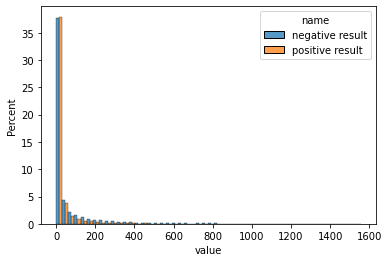

In [17]:
dfhist = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': data_neg, 'name': 'negative result'}),
    pd.DataFrame.from_dict({'value': data_pos, 'name': 'positive result'})
])
fig, ax = plt.subplots()
sns.histplot(
    data=dfhist, x='value', hue='name', multiple='dodge', stat='percent', bins=50,
     ax=ax
)


# note
* According to this histogram, there are extremely few records in this dataset with a value larger than 800. As a result, I constrain the x axes to (0,800) in the intention of receiving more accurate illustration. 

(0.0, 800.0)

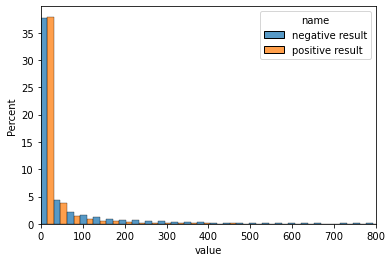

In [18]:
dfhist = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': data_neg, 'name': 'negative result'}),
    pd.DataFrame.from_dict({'value': data_pos, 'name': 'positive result'})
])
fig, ax = plt.subplots()
sns.histplot(
    data=dfhist, x='value', hue='name', multiple='dodge', stat='percent', bins=50,
     ax=ax
)
ax.set_xlim([0, 800])

# note
* I  found that histogram is not suitable for my purpose .
* My objective is to compare the response time distributions of two defined categories. however, this diagram does not provide us with much information.

{'whiskers': [<matplotlib.lines.Line2D at 0x22165268490>,
 'caps': [<matplotlib.lines.Line2D at 0x22165268b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x22165268130>,
 'medians': [<matplotlib.lines.Line2D at 0x22165272250>,
 'fliers': [<matplotlib.lines.Line2D at 0x22165272550>,
 'means': []}

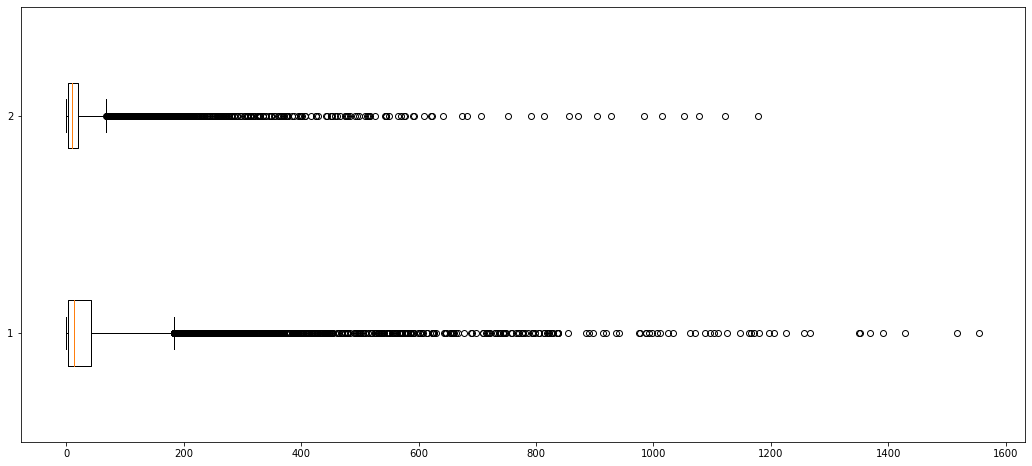

In [19]:
fig, ax = plt.subplots(figsize=(18,8))
ax.boxplot([data_dissatisfied, data_satisfied], vert=False, whis=(0,90), widths=0.3)

# note
* box plot seems suitable

In [20]:

df['duration'].describe()

count                      31520
mean      2 days 09:40:02.360012
std       5 days 15:50:46.996949
min              0 days 00:03:00
25%       0 days 03:11:08.599161
50%       0 days 12:03:40.140711
75%       1 days 13:06:26.913897
max      68 days 03:26:01.353675
Name: duration, dtype: object

In [21]:
df_negative['duration'].describe()

count                      7320
mean     2 days 14:56:16.352780
std      5 days 23:13:14.632646
min             0 days 00:06:00
25%      0 days 03:32:08.322029
50%      0 days 12:50:50.332892
75%             1 days 17:47:15
max            64 days 19:04:00
Name: duration, dtype: object

In [22]:
df_negative['duration'].quantile(0.90)

Timedelta('7 days 14:49:30.582320')

In [23]:
df['duration'].quantile(0.90)

Timedelta('6 days 17:21:46.220353')

In [24]:
#total number of tickets
number_of_tickets = df.count()['customer_satisfaction']
number_of_tickets

31520

In [25]:
df['duration'][df['duration'] < pd.Timedelta(days=15)].shape[0]/number_of_tickets

0.9609454314720812

## decision about the frame of data for plotting box plots
* from the outliers in histogram, boxplot, and the information from different quantiles of the response time data, I decided to choose the tickets with the response time below 15 days as the framing. 

# fourth diagram
* I began by using a line plot to investigate the association between ticket volume and customer satisfaction. however, this plot does not immediately convey the message I desire

In [26]:
df['date'] = df['creation_date'].dt.date
df['date2'] = df['view_date'].dt.date

In [27]:
datedf1 =  df[['date','customer_satisfaction']].groupby('date').count().reset_index()
datemean = df[['date','customer_satisfaction']].groupby('date').mean().reset_index().rename(columns={'customer_satisfaction': 'mean_satisfaction'})
datecount =  df[['date','customer_satisfaction']].groupby('date').count().reset_index().rename(columns={'customer_satisfaction': 'totalticket'})
correlationdf = datemean.merge(datecount)
daterate = df[['date','customer_satisfaction','user_actioned']].groupby(['date','customer_satisfaction']).count().reset_index().rename(columns={'user_actioned': 'totalrate'})

totaldf = daterate.merge(datecount)
totaldf['ratio'] = (totaldf['totalrate']/totaldf['totalticket']) * 100
datedf1 =  df[['date','customer_satisfaction']].groupby('date').count().reset_index()

(2.0, 3.5)

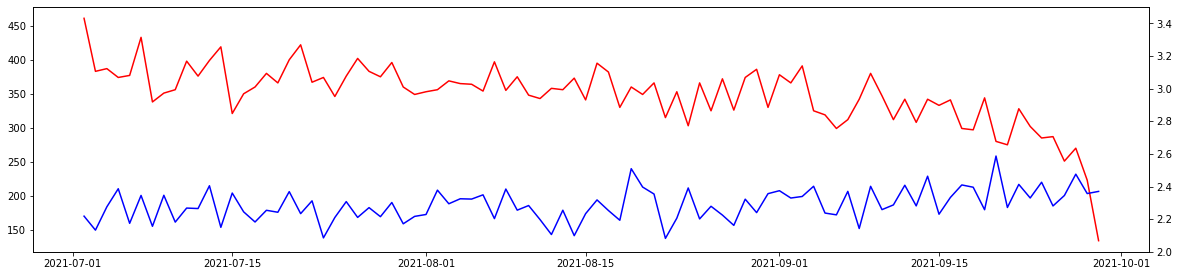

In [28]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20,4.5))
ax1.plot(datedf1['date'], datedf1['customer_satisfaction'], color='red')
ax2 = ax1.twinx()
ax2.plot(datemean['date'], datemean['mean_satisfaction'], color='blue')
ax2.set_ylim((2,3.5))